<img src='pic1.jpg'/>

In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
# /
from datetime import datetime

# Stack Overflow: Tag Prediction

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

<h3>2.2.2 Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

<h3>3.1.1 Using Pandas with SQLite to Load the data</h3>

In [6]:
#Creating db file from csv
#Learn SQL: https://www.w3schools.com/sql/default.asp
if not os.path.isfile('train.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 10000
    j = 0
    index_start = 1
    for df in pd.read_csv('D:\\Train_stack.csv', names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8',nrows = 50000 ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

10000 rows
20000 rows
30000 rows
40000 rows
50000 rows
Time taken to run this cell : 0:00:12.948169


<h3> 3.1.2 Counting the number of rows </h3>

In [7]:
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)
    #Always remember to close the database
    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

Number of rows in the database : 
 50000
Time taken to count the number of rows : 0:00:00.047986


<h3>3.1.3 Checking for duplicates </h3>

In [8]:
#Learn SQl: https://www.w3schools.com/sql/default.asp
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    df_no_dup = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM data GROUP BY Title, Body, Tags', con)
    con.close()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the first to genarate train.db file")

Time taken to run this cell : 0:00:01.840181


In [18]:
df_no_dup.loc[24:30]
# we can observe that there are duplicates

,Title,Body,Tags,cnt_dup
24,"""Classic"" activity monitor in SQL Server Manag...",<p>Right now I'm using SQL Server Management S...,sql-server dba ssms-2008,1
25,"""Closures are poor man's objects and vice vers...",<blockquote>\n <p>Closures are poor man's obj...,functional-programming object oop closures,2
26,"""Connection to SQL server files require SQL Se...",<p>I am very much new to the .net framework an...,visual-studio visual-studio-2008 sql-server-2005,1
27,"""Content Not Supposed to Be Outside 'Script' o...",<p>I'm starting to learn ASP.NET and it's the ...,asp.net .net,1
28,"""Could not find or load main class"" OS X M.Lion",<p>I'm having a problem running example code t...,java osx runtime-error,1
29,"""Couldn't find valid filesystem superblock"" wh...",<p>I've a shiny new Ubuntu 11.04 installation....,ubuntu,1
30,"""Cut and Paste"" - moving nodes in the DOM with...",<p>I have html code that looks roughly like th...,javascript dom,1


In [19]:
print("number of duplicate questions :", num_rows['count(*)'].values[0]- df_no_dup.shape[0], "(",(1-((df_no_dup.shape[0])/(num_rows['count(*)'].values[0])))*100,"% )")

number of duplicate questions : 143 ( 0.28599999999999737 % )


In [20]:
# number of times each question appeared in our database
df_no_dup.cnt_dup.value_counts()

1    49714
2      143
Name: cnt_dup, dtype: int64

In [21]:
start = datetime.now()
df_no_dup["tag_count"] = df_no_dup["Tags"].apply(lambda text: len(text.split(" ")))
# adding a new feature number of tags per question
print("Time taken to run this cell :", datetime.now() - start)
df_no_dup.head()

Time taken to run this cell : 0:00:00.067982


,Title,Body,Tags,cnt_dup,tag_count
0,Accessing @Local Session Bean from an exposed...,<p>What I am trying to do should be very strai...,ejb resteasy,1,2
1,Encoding of sent data not working,"<p>I've got a little chatbox, everything's wor...",php jquery ajax encoding,1,4
2,Google Map location based on address,"<p>Im using Google Map in my application, it i...",android google-maps,1,2
3,How to insert custom field in typo3 Dam modul...,<p>I introduced my custom field in Dam modules...,typo3 dam,1,2
4,How to preserve case using re.IGNORECASE and ...,<pre><code>import re\n\ndef bold_partial(long_...,python regex,1,2


In [22]:
# distribution of number of tags per question
df_no_dup.tag_count.value_counts()

3    14435
2    13233
4     9536
1     6828
5     5825
Name: tag_count, dtype: int64

So here we have 
- 14435 rows with 3 tags 
- 13233 rows with 2 tags
- 9536 rows with 4 tags
- 6828 rows with 1 tag
- 5825 rows with 5 tags

In [23]:
#Creating a new database with no duplicates
if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dup_train',disk_dup)

In [24]:
no_dup.shape

(49857, 3)

In [25]:
no_dup.head(2)

,Title,Body,Tags
0,Accessing @Local Session Bean from an exposed...,<p>What I am trying to do should be very strai...,ejb resteasy
1,Encoding of sent data not working,"<p>I've got a little chatbox, everything's wor...",php jquery ajax encoding


In [33]:
#This method seems more appropriate to work with this much data.
#creating the connection with database file.
if os.path.isfile('train_no_dup.db'):
    start = datetime.now()
    con = sqlite3.connect('train_no_dup.db')
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", con)
    #Always remember to close the database
    con.close()

    # Let's now drop unwanted column.
#     tag_data.drop(tag_data.index[0], inplace=True)
    #Printing first 5 columns from our data frame
    tag_data.head()
    print("Time taken to run this cell :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cells to genarate train.db file")

Time taken to run this cell : 0:00:00.284752


In [34]:
tag_data.head()

,Tags
0,ejb resteasy
1,php jquery ajax encoding
2,android google-maps
3,typo3 dam
4,python regex


In [35]:
tag_data.shape

(49857, 1)

<h2> 3.2 Analysis of Tags </h2>

<h3> 3.2.1 Total number of unique tags </h3>

In [36]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(tag_data['Tags'])

In [37]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 49857
Number of unique tags : 13892


In [42]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.class-file', '.each', '.emf', '.hgtags', '.htaccess', '.htpasswd', '.mov', '.net', '.net-1.1', '.net-2.0']


<h3> 3.2.3 Number of times a tag appeared </h3>

In [44]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

x = np.matrix(np.arange(12).reshape((3,4))); x
matrix([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
x.getA1()
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [62]:
freqs

array([1, 6, 1, ..., 1, 1, 4], dtype=int64)

In [73]:
result

{'.class-file': 1,
 '.each': 6,
 '.emf': 1,
 '.hgtags': 1,
 '.htaccess': 175,
 '.htpasswd': 1,
 '.mov': 1,
 '.net': 1318,
 '.net-1.1': 1,
 '.net-2.0': 17,
 '.net-3.5': 40,
 '.net-4.0': 62,
 '.net-4.5': 8,
 '.net-assembly': 12,
 '.net-cf-3.5': 1,
 '.net-framework': 2,
 '.net-remoting': 1,
 '.net2.0': 1,
 '.net4.0': 2,
 '.nettiers': 1,
 '.obj': 1,
 '.post': 2,
 '.refresh': 1,
 '.war': 1,
 '.x': 2,
 '1080p': 2,
 '10gbethernet': 1,
 '10gige': 1,
 '1and1': 2,
 '2003': 1,
 '2007': 43,
 '2010': 63,
 '2013': 8,
 '24bit': 1,
 '2d': 19,
 '2d-array': 7,
 '2d-games': 1,
 '2wire': 1,
 '3-tier': 1,
 '3.0': 9,
 '3.0.1': 1,
 '301-redirect': 1,
 '32-bit': 6,
 '32bit': 2,
 '32bit-64bit': 9,
 '3d': 46,
 '3d-engine': 1,
 '3d-model': 2,
 '3d-modelling': 1,
 '3des': 2,
 '3dsmax': 3,
 '3g': 8,
 '3rd-party-library': 1,
 '401': 1,
 '403': 1,
 '404': 1,
 '404-error': 5,
 '4d': 1,
 '5.1': 1,
 '500-error': 1,
 '64-bit': 36,
 '64bit': 17,
 '6502': 1,
 '6510': 1,
 '68000': 1,
 '7-zip': 5,
 '70-667': 1,
 '7zip': 5,


In [45]:
#Saving this dictionary to csv files.
if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.class-file,1
1,.each,6
2,.emf,1
3,.hgtags,1
4,.htaccess,175


In [46]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

In [47]:
tag_df_sorted.head()

,Tags,Counts
1520,c#,3845
6021,java,3399
8927,php,3232
6056,javascript,3089
419,android,2673


Here, we can see that c#, java , php, javascript, android has more nuber of tag counts

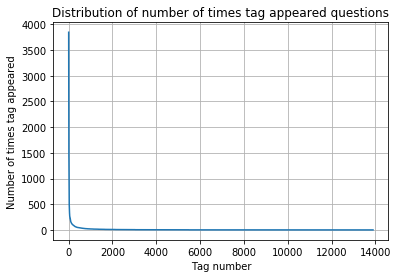

In [48]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

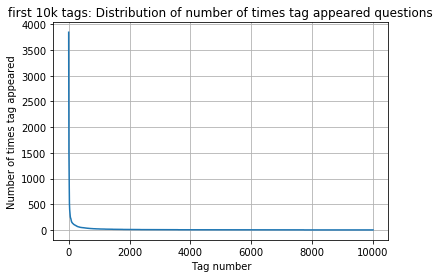

400 [3845  516  263  211  152  132  120  106   97   88   80   72   65   61
   57   52   49   47   46   44   42   40   39   36   35   34   32   31
   30   28   27   26   25   24   24   23   22   22   21   20   20   19
   19   18   18   17   17   17   16   16   16   15   15   15   15   14
   14   14   13   13   13   13   12   12   12   12   11   11   11   11
   11   11   10   10   10   10   10   10    9    9    9    9    9    9
    9    9    8    8    8    8    8    8    8    8    8    7    7    7
    7    7    7    7    7    7    7    7    6    6    6    6    6    6
    6    6    6    6    6    6    6    6    6    6    5    5    5    5
    5    5    5    5    5    5    5    5    5    5    5    5    5    5
    5    5    5    5    4    4    4    4    4    4    4    4    4    4
    4    4    4    4    4    4    4    4    4    4    4    4    4    4
    4    4    4    4    4    3    3    3    3    3    3    3    3    3
    3    3    3    3    3    3    3    3    3    3    3    3    3    3
  

In [49]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

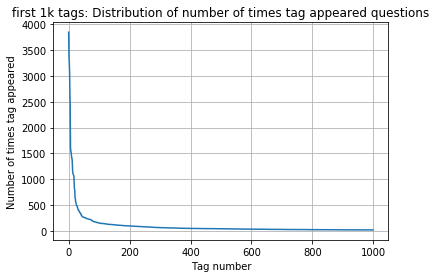

200 [3845 2423 1410 1092  792  516  434  383  323  276  263  253  239  230
  224  211  189  177  172  161  152  148  145  142  136  132  128  127
  125  122  120  115  112  111  109  106  103  101  100   99   97   95
   93   92   90   88   86   85   84   81   80   79   77   76   74   72
   70   68   67   66   65   64   63   62   62   61   59   59   58   57
   57   55   54   53   52   52   51   51   50   50   49   49   49   48
   47   47   47   46   46   46   46   46   45   45   44   44   44   43
   43   43   42   42   41   41   41   40   40   40   40   39   39   38
   37   37   36   36   36   36   36   35   35   34   34   34   34   34
   33   33   32   32   32   31   31   31   31   31   30   30   30   30
   30   29   29   28   28   28   28   28   27   27   27   27   26   26
   26   26   26   26   25   25   25   25   25   25   24   24   24   24
   24   24   24   23   23   23   23   23   23   23   22   22   22   22
   22   22   22   22   21   21   21   21   21   21   21   21   20   20
  

In [50]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

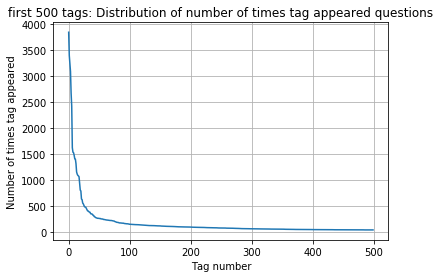

100 [3845 2423 1410 1092  792  516  434  383  323  276  263  253  239  230
  224  211  189  177  172  161  152  148  145  142  136  132  128  127
  125  122  120  115  112  111  109  106  103  101  100   99   97   95
   93   92   90   88   86   85   84   81   80   79   77   76   74   72
   70   68   67   66   65   64   63   62   62   61   59   59   58   57
   57   55   54   53   52   52   51   51   50   50   49   49   49   48
   47   47   47   46   46   46   46   46   45   45   44   44   44   43
   43   43]


In [51]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

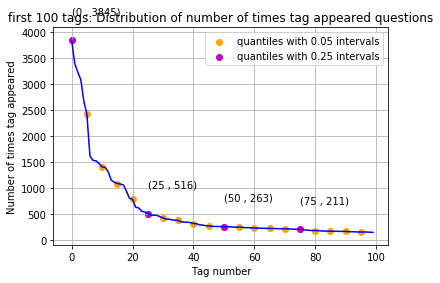

20 [3845 2423 1410 1092  792  516  434  383  323  276  263  253  239  230
  224  211  189  177  172  161]


In [76]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [55]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>100].Tags
#Print the length of the list
print ('{} Tags are used more than 100 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>1000].Tags
#Print the length of the list.
print ('{} Tags are used more than 1000 times'.format(len(lst_tags_gt_100k)))

188 Tags are used more than 100 times
18 Tags are used more than 1000 times


<b>Observations:</b><br />
1. There are total 188 tags which are used more than 100 times.
2. 18 tags are used more than 1000 times.
3. Most frequent tag (i.e. c#) is used 3845 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

<h3> 3.2.4 Tags Per Question </h3>

In [57]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting list of lists into single list, we will get [[3], [4], [2], [2], [3]] and we are converting this to [3, 4, 2, 2, 3]
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:10])

We have total 49857 datapoints.
[2, 4, 2, 2, 2, 5, 4, 3, 3, 3]


In [58]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.885613


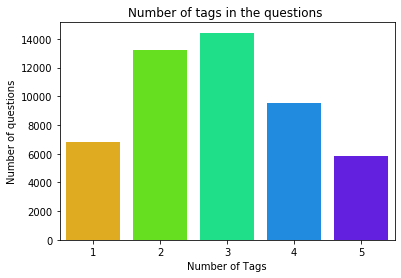

In [59]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags

<h3>3.2.5 Most Frequent Tags </h3>

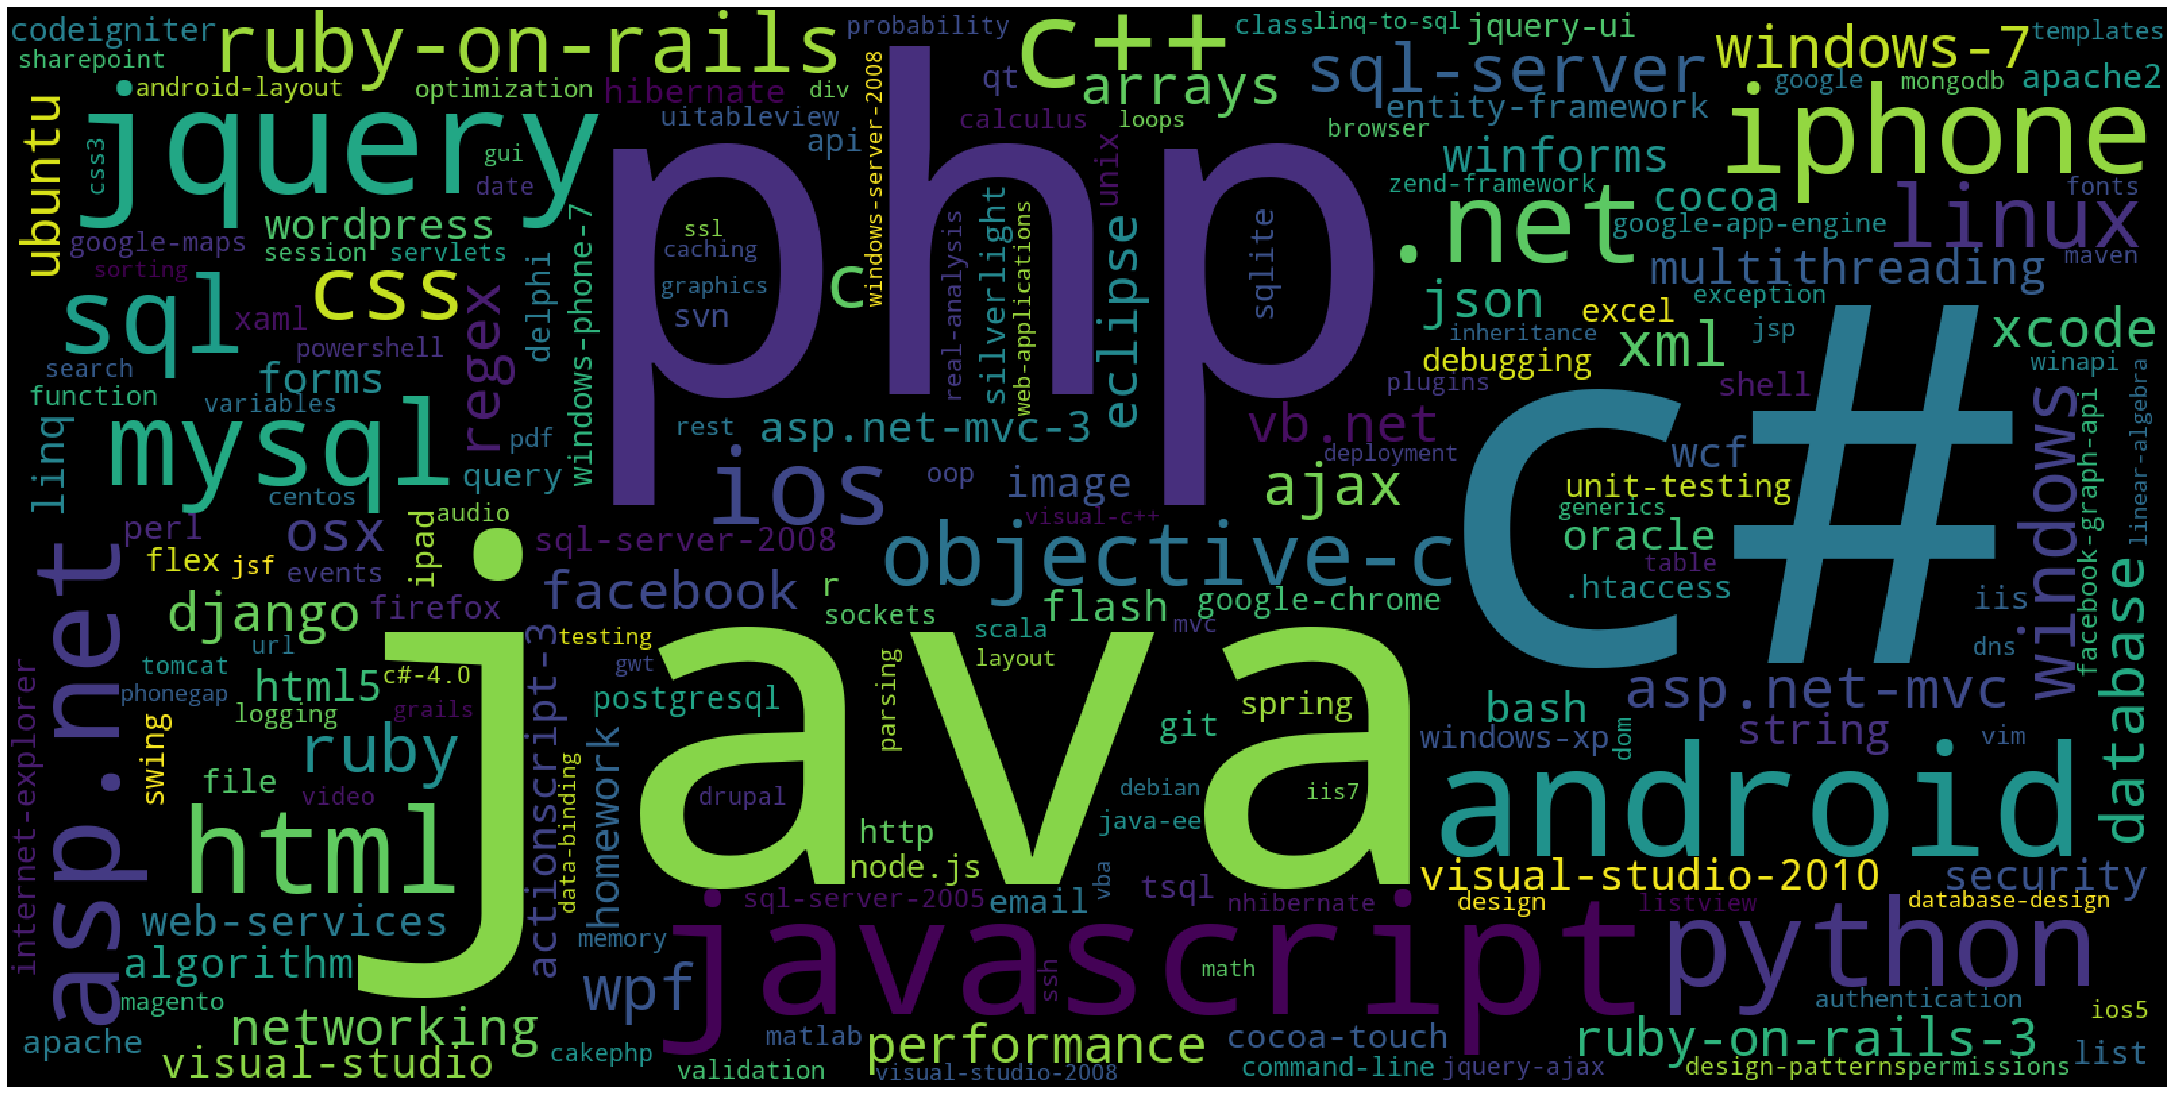

Time taken to run this cell : 0:00:05.642980


In [60]:
# Ploting word cloud
start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "jquery", "javascript", "c++" are some of the most frequent tags.

<h3> 3.2.6 The top 20 tags </h3>

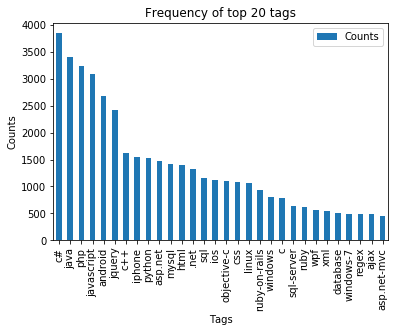

In [61]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h3> 3.3 Cleaning and preprocessing of Questions </h3>

<h3> 3.3.1 Preprocessing </h3>

<ol> 
    <li> Sample 1M data points </li>
    <li> Separate out code-snippets from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [78]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [79]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [80]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM();")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

Tables in the databse:
QuestionsProcessed
Cleared All the rows
Time taken to run this cell : 0:00:02.338703


__ we create a new data base to store the sampled and preprocessed questions __

In [82]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rburr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [83]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/

start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

Avg. length of questions(Title+Body) before processing: 1151
Avg. length of questions(Title+Body) after processing: 328
Percent of questions containing code: 55
Time taken to run this cell : 0:01:40.387549


In [84]:
# dont forget to close the connections, or else you will end up with locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [85]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('enforc distinct select multipl combobox bound common sourc wpf app combobox popul way datat alreadi contain distinct name fetch record use name select combobox avail combobox list read question wpf multipl combobox bound common sourc enforc distinct select find way',)
----------------------------------------------------------------------------------------------------
('access deni domain secur group creat sub site uniqu permiss add ad domain secur group sharepoint group read permiss level tri login user group get access deni error add user direct read permiss abl access site domain ad group distribut group someth user profil synchron specif set ad secur group prevent group access site',)
----------------------------------------------------------------------------------------------------
('save imag user prefer anyon experi save app prefer within app set app involv imag taken camera pref includ nsstring uiimag bool etc uiimag pic taken camera could store n

In [86]:

write_db = 'Processed.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [90]:
preprocessed_data.head()

,question,tags
0,two word initi mean exampl two word initi mean...,logic propositional-calculus first-order-logic
1,enforc distinct select multipl combobox bound ...,c# wpf combobox wpf-controls
2,access deni domain secur group creat sub site ...,permissions user-profile-service security-trim...
3,save imag user prefer anyon experi save app pr...,iphone objective-c uiimage preferences
4,ie bug toggleclass overflow hidden issu diffic...,jquery css internet-explorer debugging


In [89]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 49854
number of dimensions : 2


<h1>4. Machine Learning Models </h1>

<h2> 4.1 Converting tags for multilabel problems </h2>

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [91]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

__ We will sample the number of tags instead considering all of them (due to limitation of computing power) __

In [92]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [93]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

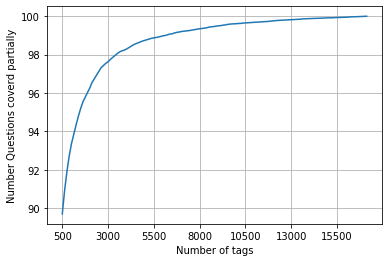

with  5500 tags we are covering  99.152 % of questions


In [111]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")

In [112]:
multilabel_yx = tags_to_choose(5500)
print("number of questions that are not covered :", questions_explained_fn(5500),"out of ", total_qs)

number of questions that are not covered : 423 out of  49854


In [113]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 13892
number of tags taken : 5500 ( 39.59113158652462 %)


__ We consider top 15% tags which covers  99% of the questions __

<h2>4.2 Split the data into test and train (80:20) </h2>

In [114]:
total_size=preprocessed_data.shape[0]
train_size=int(0.80*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [115]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (39883, 5500)
Number of data points in test data : (9971, 5500)


<h2>4.3 Featurizing data </h2>

In [116]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:24.510481


In [117]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (39883, 105703) Y : (39883, 5500)
Dimensions of test data X: (9971, 105703) Y: (9971, 5500)


In [0]:
# https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/
#https://stats.stackexchange.com/questions/117796/scikit-multi-label-classification
# classifier = LabelPowerset(GaussianNB())
"""
from skmultilearn.adapt import MLkNN
classifier = MLkNN(k=21)

# train
classifier.fit(x_train_multilabel, y_train)

# predict
predictions = classifier.predict(x_test_multilabel)
print(accuracy_score(y_test,predictions))
print(metrics.f1_score(y_test, predictions, average = 'macro'))
print(metrics.f1_score(y_test, predictions, average = 'micro'))
print(metrics.hamming_loss(y_test,predictions))

"""
# we are getting memory error because the multilearn package 
# is trying to convert the data into dense matrix
# ---------------------------------------------------------------------------
#MemoryError                               Traceback (most recent call last)
#<ipython-input-170-f0e7c7f3e0be> in <module>()
#----> classifier.fit(x_train_multilabel, y_train)

"\nfrom skmultilearn.adapt import MLkNN\nclassifier = MLkNN(k=21)\n\n# train\nclassifier.fit(x_train_multilabel, y_train)\n\n# predict\npredictions = classifier.predict(x_test_multilabel)\nprint(accuracy_score(y_test,predictions))\nprint(metrics.f1_score(y_test, predictions, average = 'macro'))\nprint(metrics.f1_score(y_test, predictions, average = 'micro'))\nprint(metrics.hamming_loss(y_test,predictions))\n\n"

<h2> 4.4 Applying Logistic Regression with OneVsRest Classifier </h2>

In [118]:
# this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# This takes about 6-7 hours to run.
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))


accuracy : 0.07491726005415705
macro f1 score : 0.06885152416621966
micro f1 scoore : 0.3656687932820764
hamming loss : 0.0004242485024753604
Precision recall report :
               precision    recall  f1-score   support

           0       0.56      0.24      0.33       764
           1       0.73      0.44      0.55       699
           2       0.83      0.55      0.66       686
           3       0.76      0.46      0.57       622
           4       0.94      0.75      0.83       538
           5       0.86      0.64      0.73       487
           6       0.59      0.28      0.38       314
           7       0.64      0.44      0.52       302
           8       0.87      0.61      0.72       281
           9       0.83      0.47      0.60       324
          10       0.89      0.60      0.71       288
          11       0.47      0.20      0.28       266
          12       0.40      0.12      0.18       259
          13       0.56      0.31      0.40       236
          14       0

In [0]:
from sklearn.externals import joblib
joblib.dump(classifier, 'lr_with_equal_weight.pkl') 

<h2> 4.5 Modeling with more weight to title and 500 tags only. </h2>

In [119]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Titlemoreweight.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [120]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table

read_db = 'train_no_dup.db'
write_db = 'Titlemoreweight.db'
# train_datasize = 400000
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        # for selecting first 0.5M rows
        reader.execute("SELECT Title, Body, Tags From no_dup_train ;")
        # for selecting random points
        #reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 500001;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")

Tables in the databse:
QuestionsProcessed
Cleared All the rows


<h3> 4.5.1 Preprocessing of questions </h3>

<ol> 
    <li> Separate Code from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> <b> Give more weightage to title : Add title three times to the question </b> </li>
   
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [121]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    
    is_code = 0
    
    title, question, tags = row[0], row[1], str(row[2])
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    
    title=title.encode('utf-8')
    
    # adding title three time to the data to increase its weight
    # add tags string to the training data
    
    question=str(title)+" "+str(title)+" "+str(title)+" "+question
    
#     if questions_proccesed<=train_datasize:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question+" "+str(tags)
#     else:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question

    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

Avg. length of questions(Title+Body) before processing: 1151
Avg. length of questions(Title+Body) after processing: 410
Percent of questions containing code: 55
Time taken to run this cell : 0:02:19.504463


In [122]:
# never forget to close the conections or else we will end up with database locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

__ Sample quesitons after preprocessing of data __

In [123]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('googl map locat base address googl map locat base address googl map locat base address im use googl map applic work fine provid longitud latitud nbut display locat base address string',)
----------------------------------------------------------------------------------------------------
('insert custom field typo3 dam modul custom locat insert custom field typo3 dam modul custom locat insert custom field typo3 dam modul custom locat introduc custom field dam modul work fine want display custom field overview tab first tab edit document appear last tab ext tables.php line add field dam modul',)
----------------------------------------------------------------------------------------------------
('preserv case use re.ignorecas .sub preserv case use re.ignorecas .sub preserv case use re.ignorecas .sub return nmi name roger shrubber arrang design sell shrubberi like return origin case name roger shrubber arrang design sell shrubberi sorri total noob help would

__ Saving Preprocessed data to a Database __

In [124]:
#Taking 0.5 Million entries to a dataframe.
write_db = 'Titlemoreweight.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [125]:
preprocessed_data.head()

,question,tags
0,encod sent data work encod sent data work enco...,php jquery ajax encoding
1,googl map locat base address googl map locat b...,android google-maps
2,insert custom field typo3 dam modul custom loc...,typo3 dam
3,preserv case use re.ignorecas .sub preserv cas...,python regex
4,loop perform calcul across row specif column m...,r for-loop pattern-matching aggregate reshape


In [126]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 49856
number of dimensions : 2


__ Converting string Tags to multilable output variables __ 

In [127]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

__ Selecting 500 Tags __

In [128]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

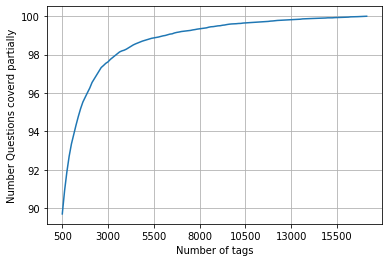

with  5500 tags we are covering  99.152 % of questions
with  500 tags we are covering  89.704 % of questions


In [129]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [130]:
# we will be taking 500 tags
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 5133 out of  49856


In [132]:
train_datasize = 40000
x_train=preprocessed_data.head(train_datasize)
x_test=preprocessed_data.tail(preprocessed_data.shape[0] - 40000)

y_train = multilabel_yx[0:train_datasize,:]
y_test = multilabel_yx[train_datasize:preprocessed_data.shape[0],:]

In [133]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (40000, 500)
Number of data points in test data : (9856, 500)


<h3> 4.5.2 Featurizing data with BOW vectorizer and ngram_range = (1,4) </h3>

In [137]:
start = datetime.now()
vectorizer = CountVectorizer(min_df=0.00009, max_features = 5000, \
                             tokenizer = lambda x: x.split(), ngram_range=(1,4))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:43.757697


In [138]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (40000, 5000) Y : (40000, 500)
Dimensions of test data X: (9856, 5000) Y: (9856, 500)


# 4.5.3. Hyperparamater Tuning of Logistic regression using GridsearchCV

In [152]:
# parameters = [(10**i) for i in range(2,-5,-1)]
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
params = {'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}

Logistic_regression = OneVsRestClassifier(LogisticRegression(),n_jobs = -1)
classifier1 = GridSearchCV(Logistic_regression, params ,scoring = 'f1_micro', cv=3)

start = datetime.now()
classifier1.fit(x_train_multilabel, y_train)

predictions =classifier1.predict(x_test_multilabel)
print('Time to train',datetime.now()-start)
print(classifier1.best_estimator_)

Time to train 2:02:08.366686
OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)


<h3> 4.5.4. Applying Logistic Regression with OneVsRest Classifier with penalty = l2</h3>

In [153]:
start = datetime.now()
classifier1 = OneVsRestClassifier(LogisticRegression(C=1, penalty='l2'), n_jobs=-1)
classifier1.fit(x_train_multilabel, y_train)
predictions = classifier1.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.19541396103896103
Hamming loss  0.003281452922077922
Micro-average quality numbers
Precision: 0.5510, Recall: 0.3802, F1-measure: 0.4499
Macro-average quality numbers
Precision: 0.4544, Recall: 0.2716, F1-measure: 0.3274
              precision    recall  f1-score   support

           0       0.45      0.35      0.39       585
           1       0.55      0.44      0.49       626
           2       0.68      0.53      0.59       780
           3       0.51      0.46      0.48       720
           4       0.83      0.73      0.77       477
           5       0.79      0.70      0.74       849
           6       0.63      0.46      0.53       333
           7       0.65      0.57      0.61       427
           8       0.73      0.50      0.59       316
           9       0.52      0.44      0.47       245
          10       0.74      0.61      0.67       291
          11       0.35      0.27      0.30       324
          12       0.17      0.13      0.15       158
         

<h3> 4.5.5. Applying Logistic Regression with OneVsRest Classifier with penalty = l1</h3>

In [154]:
start = datetime.now()
classifier3 = OneVsRestClassifier(LogisticRegression(C=1, penalty='l1'), n_jobs=-1)
classifier3.fit(x_train_multilabel, y_train)
predictions = classifier3.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.20241477272727273
Hamming loss  0.0033129058441558443
Micro-average quality numbers
Precision: 0.5407, Recall: 0.4085, F1-measure: 0.4654
Macro-average quality numbers
Precision: 0.4080, Recall: 0.3188, F1-measure: 0.3481
              precision    recall  f1-score   support

           0       0.49      0.34      0.40       585
           1       0.60      0.44      0.51       626
           2       0.72      0.53      0.61       780
           3       0.57      0.47      0.51       720
           4       0.84      0.73      0.78       477
           5       0.82      0.71      0.76       849
           6       0.67      0.46      0.54       333
           7       0.69      0.59      0.64       427
           8       0.82      0.51      0.63       316
           9       0.58      0.47      0.52       245
          10       0.72      0.63      0.67       291
          11       0.38      0.27      0.31       324
          12       0.24      0.13      0.17       158
        

## 4.5.6.  Applying SVM with  OneVsRest Classifier with penalty =l2

In [151]:
start = datetime.now()
classifier2 = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l2'), n_jobs=-1)
classifier2.fit(x_train_multilabel, y_train)
predictions = classifier2.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.12469561688311688
Hamming loss  0.00447849025974026
Micro-average quality numbers
Precision: 0.3753, Recall: 0.4044, F1-measure: 0.3893
Macro-average quality numbers
Precision: 0.2889, Recall: 0.3217, F1-measure: 0.2928
              precision    recall  f1-score   support

           0       0.38      0.37      0.37       585
           1       0.45      0.45      0.45       626
           2       0.63      0.54      0.58       780
           3       0.44      0.47      0.45       720
           4       0.77      0.71      0.74       477
           5       0.70      0.66      0.68       849
           6       0.53      0.47      0.50       333
           7       0.52      0.60      0.56       427
           8       0.54      0.52      0.53       316
           9       0.39      0.49      0.43       245
          10       0.65      0.66      0.65       291
          11       0.25      0.26      0.26       324
          12       0.11      0.13      0.12       158
          

# 6. Conclusion

In [155]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()

x.field_names = ["Model","Vectorizer",  "Hyper paramete Tuned","Penalty" ,"Tags","Macro F1","Micro F1","Accuracy","Hamming Loss"]

x.add_row(["Logistic Regression", "TFIDF","NO","L1","5500",0.0688,0.3656,0.0749,0.000424])
x.add_row(["Logistic Regression","BOW","YES","L2","500",0.3274,0.4499,0.1954,0.003281])
x.add_row(["Logistic Regression","BOW","YES","L1","500",0.3481,0.4654,0.2024,0.003312])
x.add_row(["Linear SVM","BOW","NO","L2","500",0.2928,0.3893,0.1246,0.004478])

print(x)


+---------------------+------------+----------------------+---------+------+----------+----------+----------+--------------+
|        Model        | Vectorizer | Hyper paramete Tuned | Penalty | Tags | Macro F1 | Micro F1 | Accuracy | Hamming Loss |
+---------------------+------------+----------------------+---------+------+----------+----------+----------+--------------+
| Logistic Regression |   TFIDF    |          NO          |    L1   | 5500 |  0.0688  |  0.3656  |  0.0749  |   0.000424   |
| Logistic Regression |    BOW     |         YES          |    L2   | 500  |  0.3274  |  0.4499  |  0.1954  |   0.003281   |
| Logistic Regression |    BOW     |         YES          |    L1   | 500  |  0.3481  |  0.4654  |  0.2024  |   0.003312   |
|      Linear SVM     |    BOW     |          NO          |    L2   | 500  |  0.2928  |  0.3893  |  0.1246  |   0.004478   |
+---------------------+------------+----------------------+---------+------+----------+----------+----------+--------------+
